# Network Dynamics and Graph - Politecnico di Torino - Hafez Ghaemi - S289963
## HW1 - Exercise 2

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## (a) Represent the interest pattern by using a simple bipartite graph.

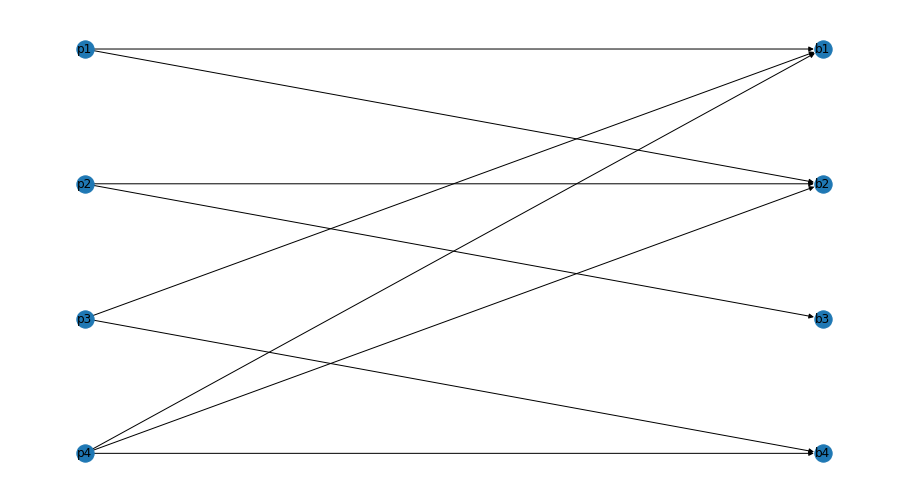

In [180]:
G = nx.DiGraph()

n=4
G.add_nodes_from(['p1', 'p2', 'p3', 'p4', 'b1', 'b2', 'b3', 'b4'])
G.add_edges_from([('p1','b1'),('p1','b2'),('p2','b2'),('p2','b3'),('p3','b1'),('p3','b4'),('p4','b1'),('p4','b2'),('p4','b4')], capacity = 1)

pos = {'p1':[0,3], 'p2':[0,2], 'p3':[0,1], 'p4':[0,0], 'b1':[1,3], 'b2':[1,2], 'b3':[1,1], 'b4':[1,0]}

f = plt.figure(figsize=(16,9))
nx.draw(G, pos, with_labels=True, ax=f.add_subplot(111))

f.savefig("graph1Q2.pdf", format='pdf')

## (b) Exploit max-flow problems to establish whether there exists a perfect matching that assigns to every person a book of interest. If a perfect matching exists, find at least a perfect matching. 

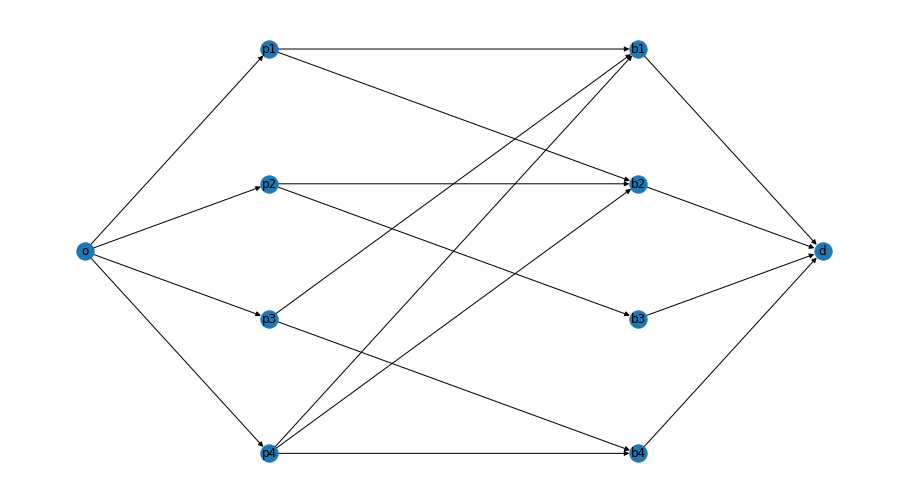

In [181]:
import copy
G_bar = copy.deepcopy(G)

G_bar.add_edges_from([('o','p1'),('o','p2'),('o','p3'),('o','p4')], capacity= 1)

G_bar.add_edges_from([('b1','d'),('b2','d'),('b3','d'),('b4','d')], capacity= 1)

pos['o']=[-0.5,1.5]
pos['d']=[1.5,1.5]

f = plt.figure(figsize=(16,9))
nx.draw(G_bar, pos, with_labels=True, ax=f.add_subplot(111))

f.savefig("graph2Q2.pdf", format='pdf')

In [182]:
from networkx.algorithms.flow import maximum_flow 
max_flow = maximum_flow(G_bar,'o','d')
print(f'The max flow in the auxiliary is n={max_flow[0]} and therefore a perfect matching exists.')

The max flow in the auxiliary is n=4 and therefore a perfect matching exists.


In [183]:
f11 = max_flow[1]['p1']
f12 = max_flow[1]['p2']
f13 = max_flow[1]['p3']
f14 = max_flow[1]['p4']
persons = ['p1', 'p2', 'p3', 'p4']
books = []
books.append(list(f11.keys())[list(f11.values()).index(1)])
books.append(list(f12.keys())[list(f12.values()).index(1)])
books.append(list(f13.keys())[list(f13.values()).index(1)])
books.append(list(f14.keys())[list(f14.values()).index(1)])
print(f'{persons} match {books}')

['p1', 'p2', 'p3', 'p4'] match ['b2', 'b3', 'b1', 'b4']


## Part c

In [192]:
def modify_G(G_bar, c):
    nx.set_edge_attributes(G_bar, 
                        {('b1', 'd'): {"capacity": c[0]}, 
                        ('b2', 'd'): {"capacity": c[1]}, 
                        ('b3', 'd'): {"capacity": c[2]},
                        ('b4', 'd'): {"capacity": c[3]}})

    nx.set_edge_attributes(G_bar, 
                        {('o', 'p1'): {"capacity": n}, 
                        ('o', 'p2'): {"capacity": n}, 
                        ('o', 'p3'): {"capacity": n},
                        ('o', 'p4'): {"capacity": n}})

    return G_bar

In [193]:
c = [2,3,2,2]
G_bar_mod = modify_G(G_bar, c)

In [194]:
max_flow = maximum_flow(G_bar_mod,'o','d')
p1 = max_flow[1]['p1']
p2 = max_flow[1]['p2']
p3 = max_flow[1]['p3']
p4 = max_flow[1]['p4']


In [195]:
print(f'The total number of books allocated: {max_flow[0]}')
print(f'Each person\'s share of books: p1: {p1}, p2: {p2}, p3: {p3}, p4: {p4}')

The total number of books allocated: 8
Each person's share of books: p1: {'b1': 0, 'b2': 1}, p2: {'b2': 1, 'b3': 1}, p3: {'b1': 1, 'b4': 1}, p4: {'b1': 1, 'b2': 1, 'b4': 1}


## Part d

In [200]:
max_flow_max = -1
p1 = None
p2 = None
p3 = None
p4 = None
c_opt = None

for i in range(n):
  for j in range(n):
    if (i!=j):
      new_c = copy.deepcopy(c)
      new_c[i] = new_c[i] - 1
      new_c[j] = new_c[j] + 1
      G_bar_mod = modify_G(G_bar, new_c)
      max_flow = maximum_flow(G_bar_mod,'o','d')
      if max_flow[0] > max_flow_max:
        p1 = max_flow[1]['p1']
        p2 = max_flow[1]['p2']
        p3 = max_flow[1]['p3']
        p4 = max_flow[1]['p4']
        max_flow_max = max_flow[0]
        c_opt = new_c

print(f'The original book distribution: {c}, the optimal book distribution: {c_opt}')
print(f'The total number of books allocated with optimal distribution: {max_flow_max}')
print(f'Each person\'s share of books: p1: {p1}, p2: {p2}, p3: {p3}, p4: {p4}')

The original book distribution: [2, 3, 2, 2], the optimal book distribution: [3, 3, 1, 2]
The total number of books allocated with optimal distribution: 9
Each person's share of books: p1: {'b1': 1, 'b2': 1}, p2: {'b2': 1, 'b3': 1}, p3: {'b1': 1, 'b4': 1}, p4: {'b1': 1, 'b2': 1, 'b4': 1}
